<a href="https://colab.research.google.com/github/tirthraval/BostonHousePricePredection/blob/main/Hand_Drawn_Sketch_Recgnition_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tirth Bhavesh Raval - txr210000
 Apoorva Ajay Pise - aap190023
  Abhilash Vadla -axv200018

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
learn_path=r"gdrive/My Drive/Final Dataset/Train"
val_path=r"gdrive/My Drive/Final Dataset/Test"

In [ ]:
x_learn=[]

for repo in os.listdir(learn_path):

    sub_route=train_path+"/"+repo

    for pic in os.listdir(sub_route):

        pic_path=sub_route+"/"+pic

        imgage_array=cv2.imread(pic_path,0)# we pass second arrgument as 0 because it will convert rgb image to grayscale

        imgage_array=cv2.resize(imgage_array,(224,224))

        x_learn.append(imgage_array)

In [ ]:
x_val=[]

for repo in os.listdir(val_path):

    sub_route=test_path+"/"+repo

    for pic in os.listdir(sub_route):

        pic_path=sub_route+"/"+pic

        imgage_array=cv2.imread(pic_path,0) # we pass second arrgument as 0 because it will convert rgb image to grayscale

        imgage_array=cv2.resize(imgage_array,(224,224))

        x_val.append(imgage_array)

In [ ]:
# converting x_learn and x_val into the numpy array
learn_x=np.array(x_learn) 
val_x=np.array(x_val)

In [ ]:
#print the shape of learm_x and learn_x

print("Shape of traing set:- "+str(learn_x.shape))
print("Shape of Testing set:-"+str(val_x.shape))

Shape of traing set:- (512, 224, 224)
Shape of Testing set:-(128, 224, 224)


512 images are in traing set and the size of the image is 224*224
128 images are in testing set and the size of the image is 224*224 and all images are converted in to the gray scale.

In [ ]:
#dividing all the values by 255 to convert it values in between of 0.0 and 1.0

learn_images=learn_x/255.0
val_images=val_x/255.0

In [ ]:
#Let's use ImageDataGenerator to compute the labels for the appropriate datasets. Because our images are saved in folders

learn_data = ImageDataGenerator(rescale = 1./255)
val_data = ImageDataGenerator(rescale = 1./255)

learning_set = learn_data.flow_from_directory(learn_path,target_size = (224, 224), batch_size = 30, class_mode = 'sparse')
val_set = val_data.flow_from_directory(val_path, target_size = (224, 224), batch_size = 30, class_mode = 'sparse')

Found 512 images belonging to 8 classes.
Found 128 images belonging to 8 classes.


Total we have 8 classes such as airplane, apple, bell, butterfly, cake, laptop, pizza and ship


In [ ]:
#lets get the labes of diffrent classes
learn_tag=learning_set.classes
val_tags=val_set.classes

In [ ]:
#Let's look at how the classes have been encoded in order to interpret classification.
learning_set.class_indices

{'airplane': 0,
 'apple': 1,
 'bell': 2,
 'butterfly': 3,
 'cake': 4,
 'laptop': 5,
 'pizza': 6,
 'ship': 7}

In [ ]:
# lets see the shape of traing and testing data set
print(learn_images.shape)
print(val_images.shape)
print(learn_labels.shape)
print(val_labels.shape)


(512, 224, 224)
(128, 224, 224)
(512,)
(128,)


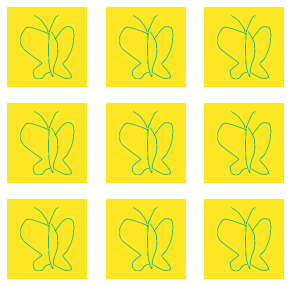

In [ ]:
# plot the pictures to get better understanding
fig, a = plt.subplots(nrows=3, ncols=3, figsize=(5,5))
a = np.ravel(a)

for k in range(len(a)):
    plt.sca(a[k])
    plt.imshow(learn_images[i])
    plt.axis('off')
    
plt.show()

we are going to use convolution nueral network for achiving image classfication. we implemetend cnn from scaratch. it has maily three operations
1) convolution 
2) maxpooling
3) softmax


In [ ]:
# creating a class which will perform the convolution operation 

class convolution_operation:
    def __init__(self, num_f, f_size):
        self.num_f = num_f
        self.f_size = f_size
        self.convolutional_filter = np.random.randn(num_f, f_size, f_size)/(f_size * f_size)

    def region(self,img): #generator function
        h, w, = img.shape
        self.img = img
        for j in range(h - self.f_size + 1):
            for k in range(w - self.f_size +1):
                img_area = img[j:(j+self.f_size),k:(k+self.f_size)]
                yield img_area, j, k

    def forward_propgation(self,img):
        h, w = img.shape
        convolution_output = np.zeros((h - self.f_size + 1, w - self.f_size+1, self.num_f))
        for img_area, i,j in self.region(img):
            convolution_output[i,j]= np.sum(img_area * self.convolutional_filter, axis=(1,2))
        return convolution_output

    def backward_propogation(self, dL_dout, learning_rate):
        dl_df = np.zeros(self.convolutional_filter.shape)
        for img_area, i,j in self.region(self.img):
              for k in range(self.num_f):
                dl_df[k] += img_area*dL_dout[i,j,k]

        #filter params update
        self.convolutional_filter -= learning_rate*dl_df
        return dl_df

In [ ]:
#creating a class for max poll opertion
class MaxPool:
  def __init__(self, f_size):
    self.f_size = f_size

  def region(self, img):
    new_h = img.shape[0] // self.f_size
    new_w = img.shape[1] // self.f_size
    self.img = img

    for i in range(new_h):
      for j in range(new_w):
        img_area = img[(i*self.f_size):(i*self.f_size + self.f_size), (j*self.f_size):(j*self.f_size + self.f_size)]
        yield img_area, i, j

  def forward_propgation(self, img):
    h, w, num_f = img.shape
    output = np.zeros((h // self.f_size, w // self.f_size, num_f))

    for img_area, i, j in self.region(img):
      output[i,j] = np.amax(img_area, axis = (0,1))

    return output


  def backward_propogation(self, dl_dout):
    dl_dmax = np.zeros(self.img.shape)
    for img_area, i, j in self.region(self.img):
      h, w, num_f = img_area.shape
      max_value = np.amax(img_area,axis = (0,1))

      for l in range(h):
        for m in range(w):
          for n in range(num_f):
            if img_area[l,m,n] == max_value[n]:
              dl_dmax[i*self.f_size + l, j*self.f_size + m, n]=dl_dout[i,j,n]
      return dl_dmax

In [ ]:
#creating class for softmax function
class Softmax:
  def __init__(self, i_node, s_node):
    self.weight = np.random.randn(i_node, s_node)/i_node #genrating weight with random value
    self.bias = np.zeros(s_node) # genrating bias with ranom values

  def forward_propgation(self, img):
    self.orig_im_shape = img.shape # it will be used in backpropgation
    img_modi = img.flatten()
    self.modified_input = img_modi #it will be used in backpropogation
    o_val = np.dot(img_modi, self.weight) + self.bias
    self.out = o_val
    e_out = np.exp(o_val)
    return e_out/np.sum(e_out, axis=0)

  def backward_propogation(self, dl_dout, l_rate):
    for i, gradiant in enumerate(dl_dout):
      if gradiant ==0:
        continue

      transformation_equation = np.exp(self.out)
      S_total = np.sum(transformation_equation)

      #finding the value of gradints with respect z
      d_dz = -transformation_equation[i]*transformation_equation / (S_total **2)
      d_dz[i] = transformation_equation[i]*(S_total -  transformation_equation[i]) / (S_total **2)


      # finding the value of gradints against of total weight, bias and input
      d_dw =  self.modified_input
      dz_db = 1
      dz_d_input = self.weight

    
      #finding the gradiants of loss agianst the totals
      dl_dz = gradiant * d_dz

      #finding the gradiants of loss against weights bias and input
      dl_dw = d_dw[np.newaxis].T @ dl_dz[np.newaxis]
      dl_db = dl_dz * dz_db
      dl_d_input = dz_d_input @ dl_dz

    self.weight -= l_rate *dl_dw
    self.bias -= l_rate * dl_db

    return dl_d_input.reshape(self.orig_im_shape)

In [ ]:
con1 = convolution_operation(8,3)
pool1 = MaxPool(2)
softmax = Softmax(111*111*8, 8)

#implementing forward propgation

def cnn_forward_proppgation(img, tag):
    out1 = con1.forward_propgation(img)
    out1 = pool1.forward_propgation(out1)
    out1 = softmax.forward_propgation(out1)

    
    #finding out the loss using cross-entropy
    c_l = -np.log(out1[tag])
    if np.argmax(out1) == tag:
      acc_eval = 1
    else:
      acc_eval = 0

    return out1, c_l, acc_eval


def learning_cnn(img, tag, learn_rate =0.001):

    output, loss, accuracy = cnn_forward_prop(img, tag)
    grad = np.zeros(8)
    grad[tag] = -1 / output[tag]
    gradiant_backprop = softmax.backward_propogation(grad, learn_rate)
    gradiant_backprop = pool1.backward_propogation(gradiant_backprop)
    gradiant_backprop = con1.backward_propogation(gradiant_backprop, learn_rate)

    return loss, accuracy

Tranning the cnn model............

In [ ]:
for epoch in range(5):
    print('ephocs %d ->'% (epoch +1))

    #shuffle the training data
    shuffle_data = np.random.permutation(len(train_images))
    learn_images = learn_images[shuffle_data]
    learn_labels = learn_labels[shuffle_data]

    l = 0.0
    n_correct = 0

    for i, (pic, tag) in enumerate(zip(train_images, train_labels)):
        if i % 100 == 0:
            print('Average Loss %.f and Accuracy: %d%%' %( l/100, n_correct))
            l = 0
            n_correct = 0

        l1, precision, = learning_cnn(pic, tag)
        l += l1

        n_correct +=precision

In [ ]:

print('Model evalution time')
l = 0
n_correct = 0

for pic, tag in zip(val_images, val_tags):
    _, l1, precision = cnn_forward_proppgation(img, label)
    l += l1
    n_correct += precision

number_t = len(val_images)
print(' Total Test error is :', l /number_t)
print('Total Testing precision: ', (n_correct / number_test)*100)